<a href="https://colab.research.google.com/github/Zauqyaraff/PZSIB-AML/blob/main/Topic15_16_HW_Zauqy_Affan_Raff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Unsupervised ML Python Homework

In [5]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [6]:
url = 'https://raw.githubusercontent.com/Zauqyaraff/PZSIB-AML/main/unsupervised_ml_homework_data.csv'
data = pd.read_csv(url)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185,-0.963639
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137,0.173625
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376,8.841673
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078,14.301682


### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [7]:
### Kode PCA dimulai disini

In [8]:
# Data split
X = data.iloc[:, 0:19].values
y = data.iloc[:, 19].values
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [9]:
#Shape of data split result
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (800, 19)
y_train shape: (800,)
X_test shape: (200, 19)
y_test shape: (200,)


In [10]:
# PCA of X_train and X_test with 80% explained variance
from sklearn.decomposition import PCA
pca_8 = PCA(0.8)

In [11]:
start_time = time.time()
pca_8.fit(X_train)
x_train_pca_8 = pca_8.transform(X_train)
x_test_pca_8 = pca_8.transform(X_test)
finish_time = time.time()

In [12]:
#Result of PCA
print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_8.n_components_, 'feature columns setelah dlakukan PCA.')
print('PCA kali ini berhasil mereduksi dataset sebanyak', (1-(pca_8.n_components_/19))*100, 'persen')
print('x_train_pca_8 shape:', x_train_pca_8.shape)

PCA Fit and Transform finished in 0.03609347343444824 seconds.
Hanya tersisa: 12 feature columns setelah dlakukan PCA.
PCA kali ini berhasil mereduksi dataset sebanyak 36.8421052631579 persen
x_train_pca_8 shape: (800, 12)


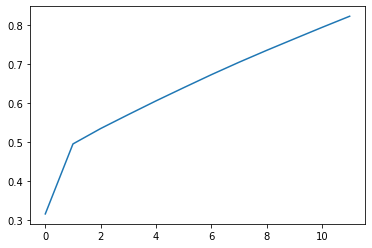

In [13]:
plt.plot(np.cumsum(pca_8.explained_variance_ratio_))
plt.show()

##### Jawab: Hasil PCA adalah mengambil 12 Principal Components.

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [14]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [15]:
# Elbow Method
#Pick column 3 and 4 for features
x = x_train_pca_8[[3,4]]
x

array([[-10.73437783, -15.27352122,  -2.93735717,   1.75067743,
        -10.36213555,  -3.44998591,  -0.88506642,  -0.60212226,
         -8.29453032,   5.14482072,  -1.30775126,  -6.22154152],
       [ -1.71819857,  16.32284858,  -3.3151975 ,  -0.58772514,
          0.83569501,  -3.36274686,  -3.86335941,   1.5397735 ,
          3.79520256, -11.897105  ,   9.40785974,  -0.86732754]])

In [16]:
x.shape

(2, 12)

In [17]:
# Reshape so there'll be no error
x1 = x.reshape(-1, 1)

In [18]:
x1.shape

(24, 1)

In [19]:
# Elbow
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    scaled_data = StandardScaler().fit_transform(x1)
    kmeans.fit(scaled_data)
    score.append(kmeans.inertia_)

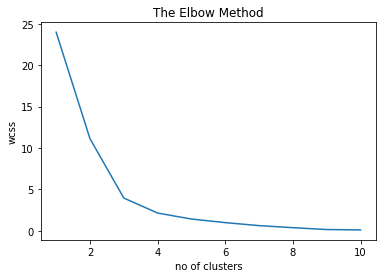

In [20]:
# Plot the score
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

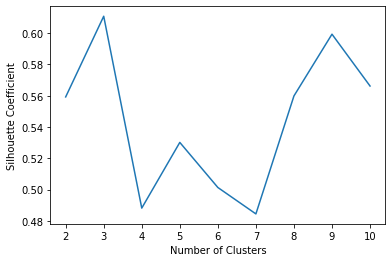

In [21]:
# Silhouette score
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Start at 2 clusters for silhouette coefficient for silhoutte score
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    scaled_data = StandardScaler().fit_transform(x1)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

# Plot the coefficients    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

'Elbow' terjadi di k = 3 dan k = 4, sedangkan nilai Silhouette tertinggi ada di k = 3. 

Berarti, kita bisa berasumsi bahwa k = 3 menjadi 'k' yang paling ideal dalam k-Means ini.

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah k = 3. 'Elbow' terjadi di k = 3 dan k= 4, sedangkan nilai Silhouette tertinggi ada di k = 3. 